In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **PREDICT DELIVERY TIME USING SORTING TIME**

In [ ]:
df=pd.read_csv("/content/delivery_time.csv")

In [ ]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# EDA and Visualizations




In [ ]:
df.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
if df is not None:
  df=df.rename(columns={'Delivery Time':'DeliveryTime','Sorting Time':'SortingTime'})

In [ ]:
df.head()

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
df[df.duplicated()].shape

(0, 2)

In [ ]:
df.describe()

,DeliveryTime,SortingTime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<ipython-input-12-1269c7248e19>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["DeliveryTime"])


<Axes: xlabel='DeliveryTime', ylabel='Density'>

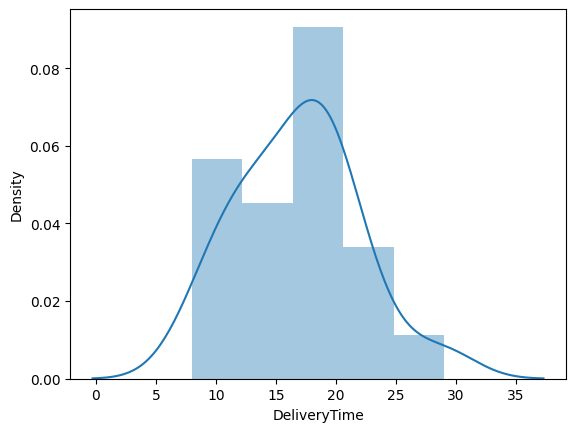

In [ ]:
sns.distplot(df["DeliveryTime"])

<ipython-input-13-2185ad0a0f85>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["SortingTime"])


<Axes: xlabel='SortingTime', ylabel='Density'>

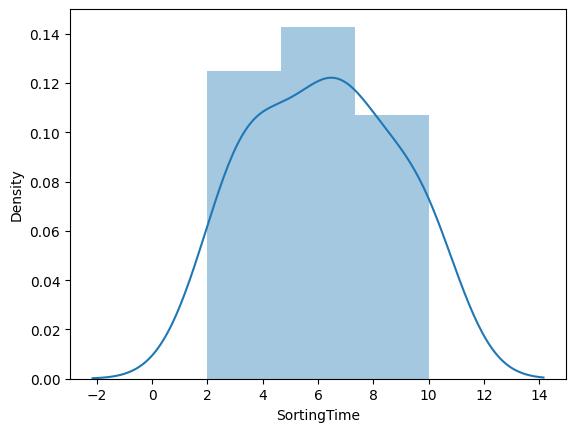

In [ ]:
sns.distplot(df["SortingTime"])

<Axes: >

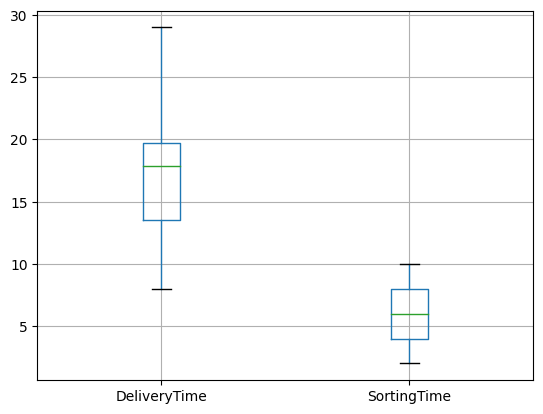

In [ ]:
df.boxplot()

<Axes: >

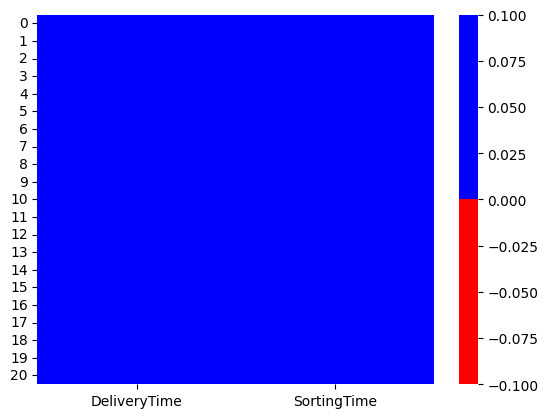

In [ ]:
cols=df.columns
colours=['red','blue']
sns.heatmap(df.isnull(),
            cmap=sns.color_palette(colours))

In [ ]:
pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 46.8 MB/s eta 0:00:00


In [ ]:
import sweetviz as sv

In [ ]:
sv_report=sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
sv_report.show_html("eda_report.html")

Report eda_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# **Correlation** **Analysis**

In [ ]:
df.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


<Axes: xlabel='SortingTime', ylabel='DeliveryTime'>

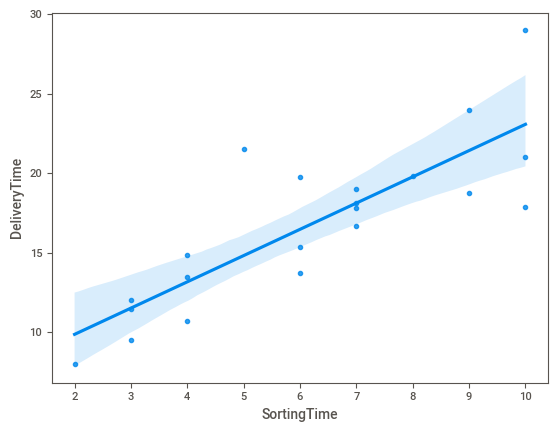

In [ ]:
sns.regplot(x=df['SortingTime'],y=df['DeliveryTime'])

# **Model Building**

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
model=smf.ols("DeliveryTime~SortingTime",data=df).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           3.98e-06
Time:                        09:47:55   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='DeliveryTime', ylabel='SortingTime'>

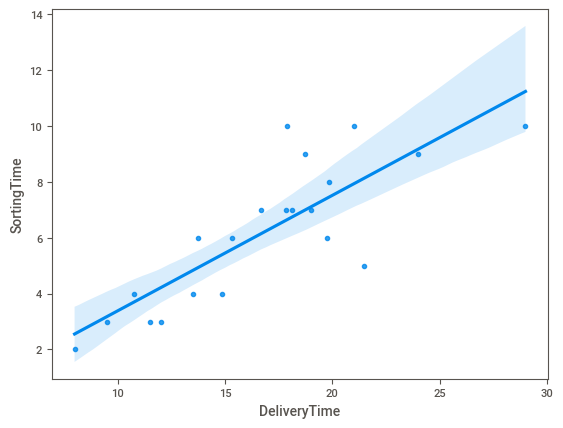

In [ ]:
sns.regplot(x="DeliveryTime",y="SortingTime",data=df)

In [ ]:
ypred=model.predict(df["SortingTime"])

In [ ]:
ypred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [ ]:
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [ ]:
print(model.tvalues, '\n', model.pvalues)

Intercept      3.823349
SortingTime    6.387447
dtype: float64 
 Intercept      0.001147
SortingTime    0.000004
dtype: float64


In [ ]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

# **Model Prediction**

In [ ]:
newdata=pd.Series([26,28])
newdata

0    26
1    28
dtype: int64

In [ ]:
data_pred=pd.DataFrame(newdata,columns=['SortingTime'])

In [ ]:
data_pred

,SortingTime
0,26
1,28


In [ ]:
yp=model.predict(data_pred)

In [ ]:
yp

0    49.457251
1    52.755291
dtype: float64

# Transformations

In [ ]:
model2=smf.ols("DeliveryTime~np.log(SortingTime)",data=df).fit()

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           2.64e-06
Time:                        10:01:19   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(SortingTime)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pred2=model2.predict(df["SortingTime"])

In [ ]:
rmse2 = np.sqrt(np.mean((np.array(df["DeliveryTime"]) - np.array(pred2)) ** 2))

In [ ]:
rmse2

2.733171476682066

In [ ]:
model3=smf.ols("np.log(DeliveryTime)~SortingTime",data=df).fit()

In [ ]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.711
Model:                              OLS   Adj. R-squared:                  0.696
Method:                   Least Squares   F-statistic:                     46.73
Date:                  Thu, 04 Jan 2024   Prob (F-statistic):           1.59e-06
Time:                          10:05:44   Log-Likelihood:                 7.7920
No. Observations:                    21   AIC:                            -11.58
Df Residuals:                        19   BIC:                            -9.495
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1214      0.103     20.601      0.000       1.906       2.337
SortingTime     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pred3=model3.predict(df["SortingTime"])

In [ ]:
pred3

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [ ]:
pred3=np.exp(pred3)

In [ ]:
rmse3=np.sqrt(np.mean((np.array(df["DeliveryTime"])-np.array(pred3))**2))

In [ ]:
rmse3

2.9402503230562007

In [ ]:
df["SortingTime_sq"]=df["SortingTime"]*df["SortingTime"]

In [ ]:
model4=smf.ols("np.log(DeliveryTime)~SortingTime+SortingTime_sq",data=df).fit()

In [ ]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.765
Model:                              OLS   Adj. R-squared:                  0.739
Method:                   Least Squares   F-statistic:                     29.28
Date:                  Thu, 04 Jan 2024   Prob (F-statistic):           2.20e-06
Time:                          10:14:24   Log-Likelihood:                 9.9597
No. Observations:                    21   AIC:                            -13.92
Df Residuals:                        18   BIC:                            -10.79
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.6997      0.228      7.441      0.000       1.220       2.180
SortingTime        0.2659      0.080      3.315      0.004       0.097       0.434
SortingTime_sq    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
df["SortingTime_sq"]




0     100
1      16
2      36
3      81
4     100
5      36
6      49
7       9
8     100
9      81
10     64
11     16
12     49
13      9
14      9
15     16
16     36
17     49
18      4
19     49
20     25
Name: SortingTime_sq, dtype: int64

In [ ]:
pred4 = model4.predict(df[['SortingTime', 'SortingTime_sq']])

In [ ]:
pred4

0     3.074863
1     2.557942
2     2.832974
3     3.052913
4     3.074863
5     2.832974
6     2.931968
7     2.381905
8     3.074863
9     3.052913
10    3.005281
11    2.557942
12    2.931968
13    2.381905
14    2.381905
15    2.557942
16    2.832974
17    2.931968
18    2.180186
19    2.931968
20    2.708299
dtype: float64

In [ ]:
pred4=np.exp(pred4)

In [ ]:
rmse4=np.sqrt(np.mean((np.array(df["DeliveryTime"])-np.array(pred4))**2))

In [ ]:
rmse4

2.799041988740932

## **Building a Prediction Model for Salary_hike**

In [ ]:
df2=pd.read_csv("/content/Salary_Data.csv")

In [ ]:
df2

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
df2.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# **EDA and Visualization**

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
df2[df2.duplicated()].shape

(0, 2)

In [ ]:
if df2 is not None:
  df2 = df2.rename({'YearsExperience': 'Experience'},axis=1)

In [ ]:
df2

,Experience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


<Axes: xlabel='Experience', ylabel='Density'>

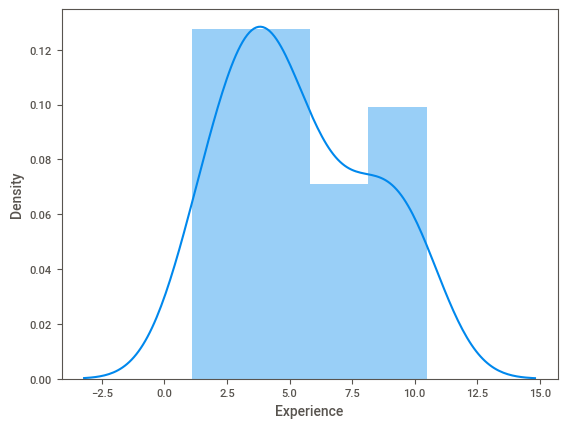

In [ ]:
sns.distplot(df2['Experience'])

<Axes: xlabel='Salary', ylabel='Density'>

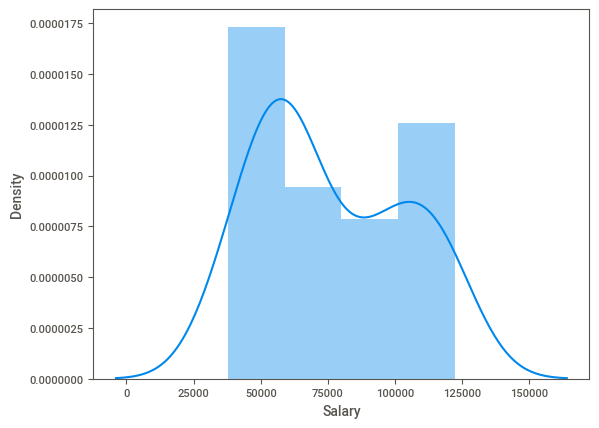

In [ ]:
sns.distplot(df2['Salary'])

<Axes: >

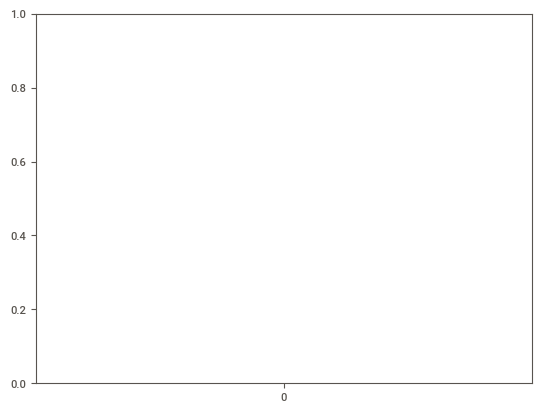

In [ ]:
sns.boxplot()

In [ ]:
df2.describe()

,Experience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<Axes: >

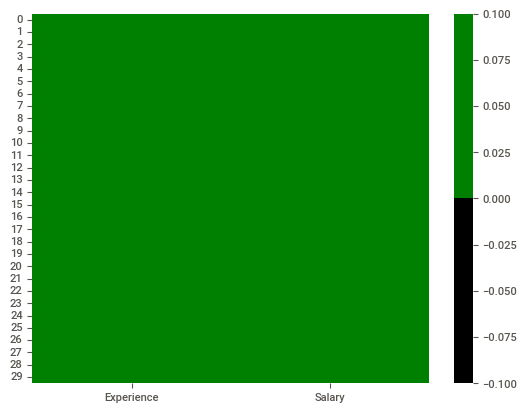

In [ ]:
cols=df2.columns
colours=['black','green']
sns.heatmap(df2[cols].isnull(),
            cmap=sns.color_palette(colours))

In [ ]:
sweet_report=sv.analyze(df2)
sweet_report.show_html('Salary.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Salary.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# **Correlation and Analysis**

In [ ]:
df2.corr()

,Experience,Salary
Experience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='Experience', ylabel='Salary'>

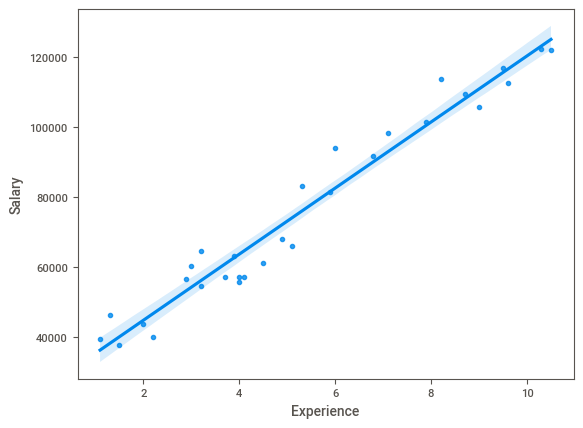

In [ ]:
sns.regplot(x='Experience',y='Salary',data=df2)

In [ ]:
model1=smf.ols("Salary~Experience",data=df2).fit()

In [ ]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           1.14e-20
Time:                        10:38:35   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
Experience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model1.params

Intercept     25792.200199
Experience     9449.962321
dtype: float64

In [ ]:
print(model1.tvalues, '\n\n', model1.pvalues)

Intercept     11.346940
Experience    24.950094
dtype: float64 

 Intercept     5.511950e-12
Experience    1.143068e-20
dtype: float64


In [ ]:
model1.rsquared,model1.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [ ]:
model2=smf.ols("Salary~np.log(Experience)",data=df2).fit()

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           3.25e-13
Time:                        11:02:06   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(Experience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model2.params

Intercept             14927.97177
np.log(Experience)    40581.98796
dtype: float64

In [ ]:
print(model2.tvalues, '\n\n',model2.pvalues)

Intercept              2.895135
np.log(Experience)    12.791989
dtype: float64 

 Intercept             7.268813e-03
np.log(Experience)    3.250155e-13
dtype: float64


In [ ]:
model2.rsquared, model2.rsquared_adj

(0.8538888828756969, 0.8486706286926861)

In [ ]:
model3=smf.ols("np.log(Salary)~Experience",data=df2).fit()

In [ ]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           7.03e-18
Time:                        11:02:22   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5074      0.038    273.327      0.000      10.429      10.586
Experience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model3.params

Intercept     10.507402
Experience     0.125453
dtype: float64

In [ ]:
model3

In [ ]:
new_data2=float(input("Enter the Years of Experience"))
df2=pd.Series([new_data2])
sa_pred=pd.DataFrame(df2,columns=["Experience"])
d=model1.predict(sa_pred)
print("Salary: ",d)

Enter the Years of Experience4
Salary:  0    63592.049484
dtype: float64
